In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable

# Подготовка и анализ данных

In [37]:
#load data
data = pd.read_csv("E:\GitHub\MasterWork\Data\S&P 500 Historical Data00-20.csv")

In [42]:
#transform data
data = data.replace(",", "", regex=True)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.set_index('Date')
data.Price = data.Price.astype(float)
data.High = data.High.astype(float)
data.Low = data.Low.astype(float)
data.Open = data.Open.astype(float)
data["Vol."] = data["Vol."].astype(float)
data.set_index('Date', inplace=True)

In [43]:
# Разобъём наши данные таким образом
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

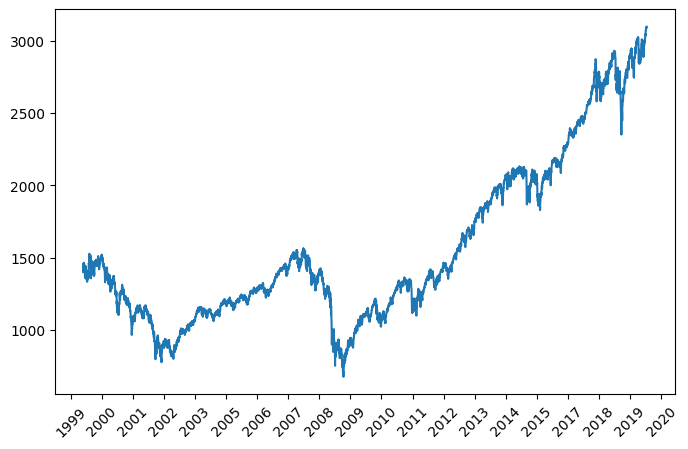

In [44]:
# Построим первоначальные данные
plt.figure(figsize = (8,5))
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation = 45)
plt.plot(data.Price)
plt.show()